# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | el calafate
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | kushiro
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | ketchikan
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | magadan
Processing Record 20 of Set 1 | tura
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,11.06,82,20,3.09,CL,1709606178
1,margaret river,-33.9500,115.0667,22.25,48,0,5.55,AU,1709606179
2,yellowknife,62.4560,-114.3525,-24.77,82,20,2.57,CA,1709606159
3,adamstown,-25.0660,-130.1015,24.37,73,49,8.27,PN,1709606180
4,iqaluit,63.7506,-68.5145,-33.15,68,0,4.12,CA,1709606180


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,11.06,82,20,3.09,CL,1709606178
1,margaret river,-33.9500,115.0667,22.25,48,0,5.55,AU,1709606179
2,yellowknife,62.4560,-114.3525,-24.77,82,20,2.57,CA,1709606159
3,adamstown,-25.0660,-130.1015,24.37,73,49,8.27,PN,1709606180
4,iqaluit,63.7506,-68.5145,-33.15,68,0,4.12,CA,1709606180


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

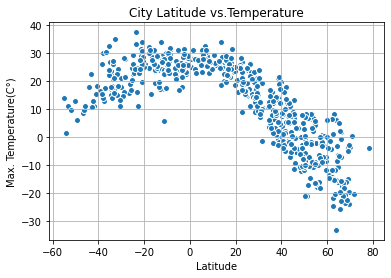

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='white')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature(C°)')
plt.title('City Latitude vs.Temperature')
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

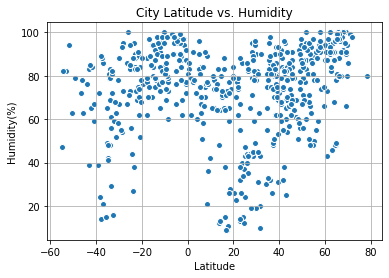

In [13]:
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='white')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity')
plt.grid()


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

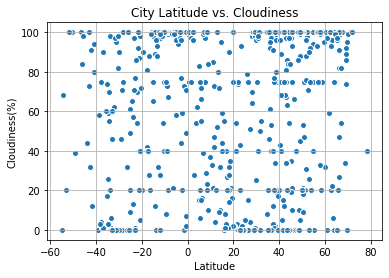

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='white')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

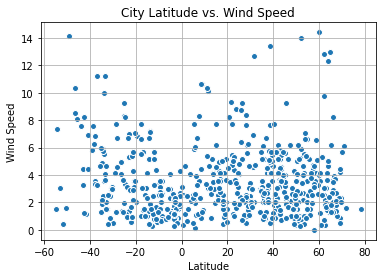

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='white')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.grid()


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
import scipy.stats as st
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis, eq_loc, y_label='Y Axis'): 
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(x_axis, y_axis)
    
    # Calculate the regression line "y values" from the slope and intercept
    reg_values = x_axis * slope + intercept
    
    # Plot the data points
    plt.scatter(x_axis, y_axis)
    
    # Plot the regression line
    plt.plot(x_axis, reg_values, "r-")
    
    # Annotate the regression line equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", xy=eq_loc, fontsize=15, color="red")
    
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    # Return the r-value
    return r_value

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,-24.77,82,20,2.57,CA,1709606159
4,iqaluit,63.7506,-68.5145,-33.15,68,0,4.12,CA,1709606180
9,kushiro,42.9750,144.3747,-1.47,69,75,5.14,JP,1709606183
10,talnakh,69.4865,88.3972,-19.64,94,95,2.30,RU,1709606001
13,stanley,54.8680,-1.6985,5.43,89,40,3.60,GB,1709606185


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,11.06,82,20,3.09,CL,1709606178
1,margaret river,-33.9500,115.0667,22.25,48,0,5.55,AU,1709606179
3,adamstown,-25.0660,-130.1015,24.37,73,49,8.27,PN,1709606180
5,el calafate,-50.3408,-72.2768,12.90,63,100,1.59,AR,1709606181
6,ushuaia,-54.8000,-68.3000,13.81,47,0,1.54,AR,1709606181


###  Temperature vs. Latitude Linear Regression Plot

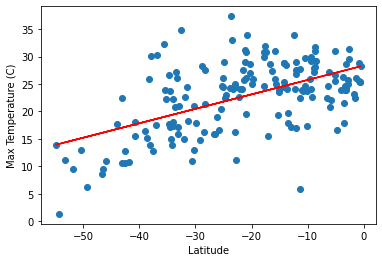

The r-value is: 0.550027730452688


In [25]:
# Linear regression on Northern Hemisphere
r_value = linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (10, -10))
print(f"The r-value is: {r_value}")

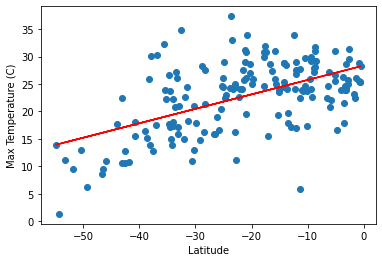

The r-value is: 0.550027730452688


In [26]:
# Linear regression on Southern Hemisphere
r_value = linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (10, -10))
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** In the northern hemisphere there is a negative correlation meaning the higher latitude of the city, the lower temperature. On the southern there is a positive correlation, the higher the latitude the higher the temperature. 

### Humidity vs. Latitude Linear Regression Plot

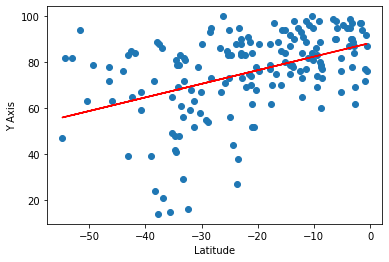

The r-value is: 0.44021638690690007


In [31]:
# Northern Hemisphere
r_value = linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (10, -10))
print(f"The r-value is: {r_value}")

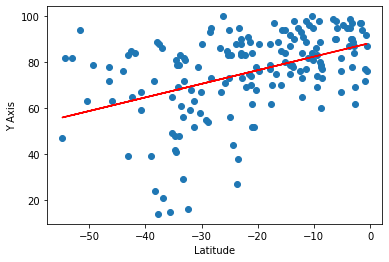

The r-value is: 0.44021638690690007


In [32]:
# Southern Hemisphere
r_value = linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (10, -10))
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** In the northern hemisphere there is a low positive correlation meaning the higher the latitude the higher the latitude the higher humidity of the city. On the southern it happens the same, but the changes for both will be minimal.

### Cloudiness vs. Latitude Linear Regression Plot

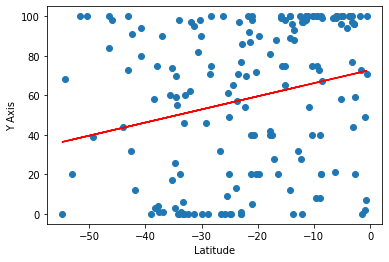

The r-value is: 0.2385326998799146


In [33]:
# Northern Hemisphere
r_value = linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (10, -10))
print(f"The r-value is: {r_value}")

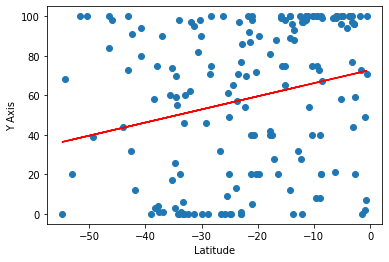

The r-value is: 0.2385326998799146


In [34]:
# Southern Hemisphere
r_value = linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (10, -10))
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** For both there is almost no correlation so the latitude has little to do with the cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

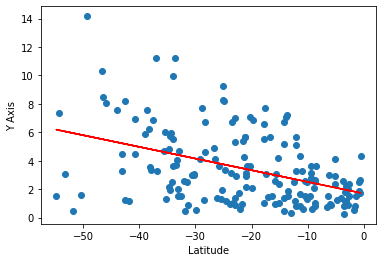

The r-value is: -0.42923934916686507


In [35]:
# Northern Hemisphere
r_value = linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (10, -10))
print(f"The r-value is: {r_value}")

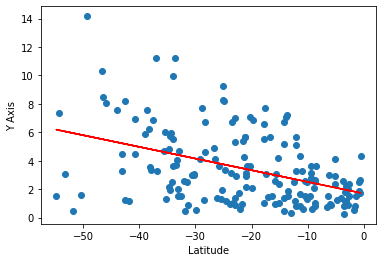

The r-value is: -0.42923934916686507


In [36]:
# Southern Hemisphere
r_value = linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (10, -10))
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** For both there is almost no correlation so the latitude has little to do with the wind speed, however in the southern there is a bit of negative correlation, but not mutch to sway the data .